<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЦПТ для различных распределений</a></span><ul class="toc-item"><li><span><a href="#Сгенерируйте-примеры-из-распределения" data-toc-modified-id="Сгенерируйте-примеры-из-распределения-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Сгенерируйте примеры из распределения</a></span></li><li><span><a href="#Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения" data-toc-modified-id="Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Постройте гистограмму выборки и теоретическую плотность распределения</a></span></li><li><span><a href="#Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок" data-toc-modified-id="Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Оценим распределение выборочного среднего для разных объёмов выборок</a></span></li></ul></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></li></ul></div>

# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [32]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
arcsine_rv = sts.arcsine(0, 1)
sample = arcsine_rv.rvs(100)
sample

array([4.64256116e-01, 9.95847988e-01, 2.40510311e-02, 9.97154065e-01,
       9.54003660e-01, 4.94698258e-01, 8.26820944e-01, 9.17588086e-02,
       9.49380021e-01, 9.05879440e-01, 1.25254772e-02, 2.01766166e-01,
       3.22133000e-01, 2.31024778e-01, 6.67034128e-01, 9.63563445e-01,
       2.49720834e-04, 2.87365213e-01, 9.90280172e-01, 4.19273443e-01,
       8.96188023e-01, 7.60108714e-01, 1.94712079e-01, 1.29265812e-03,
       3.33332337e-01, 2.45398928e-01, 9.35211756e-01, 1.29420748e-01,
       2.38407500e-01, 8.17418157e-01, 6.50536591e-01, 9.70005307e-01,
       8.89254882e-01, 6.77325255e-02, 9.64120506e-01, 3.33643651e-01,
       1.94856231e-02, 8.79417055e-02, 8.42760063e-01, 8.97811821e-01,
       6.67500454e-01, 2.71673715e-02, 4.87458318e-01, 7.78423746e-01,
       6.57156500e-01, 7.27441423e-01, 1.48530132e-01, 2.31253615e-01,
       1.48543968e-01, 3.72054669e-01, 9.04831424e-01, 9.11205231e-01,
       9.74113857e-01, 6.37502133e-01, 4.57384585e-01, 1.18236829e-01,
      

In [33]:
sample.dtype

dtype('float64')

In [34]:
real_mean = arcsine_rv.mean() # настоящее среднее случайной величины
real_mean

0.5

In [35]:
real_var = arcsine_rv.var() # настоящая дисперсия случайной величины
real_var

0.125

### Постройте гистограмму выборки и теоретическую плотность распределения

C:\Users\DNS\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


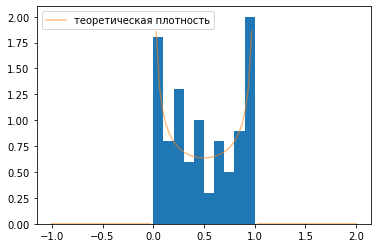

In [36]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-1,2,100)
cdf = arcsine_rv.pdf(x)
plt.plot(x, cdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [37]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.491058787405308
0.12158665968527967


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

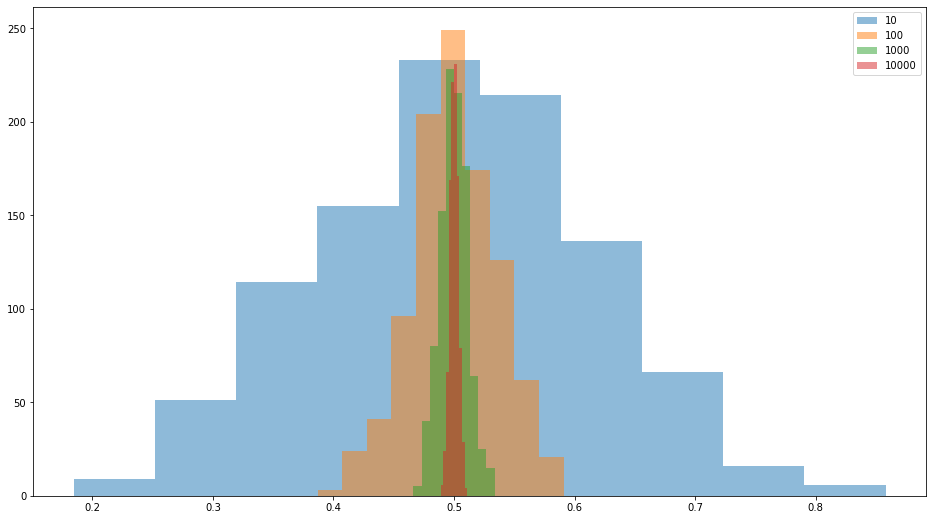

In [38]:
# ваш код тут

plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(arcsine_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [28]:
print('Для выбранного распределения апроксимация распределения выборочного среднего работает хорошо.')

Для выбранного распределения апроксимация распределения выборочного среднего работает хорошо.


## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [2]:
import requests
import io

url ='https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
s = requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('UTF8')))
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
url ='https://drive.google.com/uc?export=download&id=1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8'
df = pd.read_csv(url)[['total day calls', 'churn']]
df.head()

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False


In [4]:
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия - churn (ушел): [{}, {}] ".format(
    df[df['churn'] == True]['total day calls'].mean() - 2 *  df[df['churn'] == True]['total day calls'].std() / np.sqrt(df[df['churn'] == True].shape[0]), df[df['churn'] == True]['total day calls'].mean() + 2 * df[df['churn'] == True]['total day calls'].std() / np.sqrt(df[df['churn'] == True].shape[0]) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия - churn (ушел): [99.37134576363385, 103.2994616897823] 


In [5]:
df[df['churn'] == True]['total day calls'].var(ddof=1)

465.79598463957115

In [6]:
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия - churn (не ушел): [{}, {}] ".format(
    df[df['churn'] == False]['total day calls'].mean() - 2 *  df[df['churn'] == False]['total day calls'].std() / np.sqrt(df[df['churn'] == False].shape[0]), df[df['churn'] == False]['total day calls'].mean() + 2 * df[df['churn'] == False]['total day calls'].std() / np.sqrt(df[df['churn'] == False].shape[0]) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия - churn (не ушел): [99.54133858857831, 101.02497720089538] 


In [7]:
df[df['churn'] == False]['total day calls'].var(ddof=1)

392.08581663003537

In [8]:
df['Z'] = (df['total day calls'] - df['total day calls'].mean())/df['total day calls'].std()

In [9]:
df

,total day calls,churn,Z
0,110,False,0.476572
1,123,False,1.124334
2,114,False,0.675883
3,71,False,-1.466716
4,113,False,0.626055
...,...,...,...
3328,77,False,-1.167749
3329,57,False,-2.164306
3330,109,False,0.426744
3331,105,False,0.227432


In [10]:
from statsmodels.stats.weightstats import _zconfint_generic

In [11]:
_zconfint_generic(df['total day calls'], df['total day calls'].mean(), 0.05, 'two-sided')

(0       -86.850244
 1       -73.850244
 2       -82.850244
 3      -125.850244
 4       -83.850244
            ...    
 3328   -119.850244
 3329   -139.850244
 3330    -87.850244
 3331    -91.850244
 3332    -83.850244
 Name: total day calls, Length: 3333, dtype: float64,
 0       306.850244
 1       319.850244
 2       310.850244
 3       267.850244
 4       309.850244
            ...    
 3328    273.850244
 3329    253.850244
 3330    305.850244
 3331    301.850244
 3332    309.850244
 Name: total day calls, Length: 3333, dtype: float64)

In [12]:
df['total day calls'].mean()

100.43564356435644